<a href="https://colab.research.google.com/github/FlowAlpha/ggl-AI-samples-testing/blob/dataset-testing/weather-forecasting/notebooks/2-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title ###### Licensed to the Apache Software Foundation (ASF), Version 2.0 (the "License")

# Licensed to the Apache Software Foundation (ASF) under one
# or more contributor license agreements. See the NOTICE file
# distributed with this work for additional information
# regarding copyright ownership. The ASF licenses this file
# to you under the Apache License, Version 2.0 (the
# "License"); you may not use this file except in compliance
# with the License. You may obtain a copy of the License at
#
#   http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing,
# software distributed under the License is distributed on an
# "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY
# KIND, either express or implied. See the License for the
# specific language governing permissions and limitations
# under the License.

# 🌦️ Weather forecasting -- _Dataset_

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GoogleCloudPlatform/python-docs-samples/blob/main/people-and-planet-ai/weather-forecasting/notebooks/2-dataset.ipynb)

This sample is broken into the following notebooks:

* [![Open in Colab](https://github.com/googlecolab/open_in_colab/raw/main/images/icon16.png) **🧭 Overview**](https://colab.research.google.com/github/GoogleCloudPlatform/python-docs-samples/blob/main/people-and-planet-ai/weather-forecasting/notebooks/1-overview.ipynb):
  Go through what we want to achieve, and explore the data we want to use as _inputs and outputs_ for our model.

* ![Open in Colab](https://github.com/googlecolab/open_in_colab/raw/main/images/icon16.png) **🗄️ Create the dataset**:
  Use [Apache Beam](https://beam.apache.org/) to fetch data from [Earth Engine](https://earthengine.google.com/) in parallel, and create a dataset for our model in [Dataflow](https://cloud.google.com/dataflow).

* [![Open in Colab](https://github.com/googlecolab/open_in_colab/raw/main/images/icon16.png) **🧠 Train the model**](https://colab.research.google.com/github/GoogleCloudPlatform/python-docs-samples/blob/main/people-and-planet-ai/weather-forecasting/notebooks/3-training.ipynb):
  Build a simple _Fully Convolutional Network_ in [PyTorch](https://pytorch.org/) and train it in [Vertex AI](https://cloud.google.com/vertex-ai/docs/training/custom-training) with the dataset we created.

* [![Open in Colab](https://github.com/googlecolab/open_in_colab/raw/main/images/icon16.png) **🔮 Model predictions**](https://colab.research.google.com/github/GoogleCloudPlatform/python-docs-samples/blob/main/people-and-planet-ai/weather-forecasting/notebooks/4-predictions.ipynb):
  Get predictions from the model with data it has never seen before.

This sample leverages geospatial satellite and precipitation data from [Google Earth Engine](https://earthengine.google.com/).
Using satellite imagery, you'll build and train a model for rain "nowcasting" i.e. predicting the amount of rainfall for a given geospatial region and time in the immediate future.

* ⏲️ **Time estimate**: ~30 minutes
* 💰 **Cost estimate**: [a few cents on Dataflow](https://cloud.google.com/dataflow/pricing)

💚 This is one of many **machine learning how-to samples** inspired from **real climate solutions** aired on the [People and Planet AI 🎥 series](https://www.youtube.com/playlist?list=PLIivdWyY5sqI-llB35Dcb187ZG155Rs_7).

# 🎬 Before you begin

Let's start by cloning the GitHub repository, and installing some dependencies.

In [ ]:
# Now let's get the code from GitHub and navigate to the sample.
!git clone https://github.com/FlowAlpha/ggl-AI-samples-testing.git
%cd ggl-AI-samples-testing/weather-forecasting

fatal: destination path 'ggl-AI-samples-testing' already exists and is not an empty directory.
/content/ggl-AI-samples-testing/weather-forecasting


The [`weather-data`](serving/weather-data) local package contains the functions to get data from Earth Engine.
It is used for both creating the training dataset, and for predictions.

In [ ]:
# Upgrade `setuptools` to install packages from pyproject.toml files.
!pip install --quiet --upgrade --no-warn-conflicts pip setuptools

# We need `build` and `virtualenv` to build the local packages.
!pip install --quiet build virtualenv

# Install Apache Beam and the `weather-data` local package.
!pip install apache-beam[gcp] serving/weather-data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 43.6 MB/s eta 0:00:00
Processing ./serving/weather-data
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.9/648.9 kB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

> **🛑 Restart the runtime 🛑**

Colab already comes with many dependencies pre-loaded.
In order to ensure everything runs as expected, we **_must_ restart the runtime**. This allows Colab to load the latest versions of the libraries.

!["Runtime" > "Restart runtime"](https://github.com/GoogleCloudPlatform/python-docs-samples/blob/main/people-and-planet-ai/weather-forecasting/notebooks/images/restart-runtime.png?raw=1)

In [ ]:
# Alternatively, restart the runtime by ending the process.
exit()

After restarting the runtime, let's navigate back into the sample directory.

In [ ]:
%cd python-docs-samples/people-and-planet-ai/weather-forecasting

[Errno 2] No such file or directory: 'python-docs-samples/people-and-planet-ai/weather-forecasting'
/content


In [ ]:
from __future__ import annotations

import os
from google.colab import auth

# Please fill in these values.
project = "sanford-project-04a9"  # @param {type:"string"}
bucket = "example-bucket-dd-6-29"  # @param {type:"string"}
location = "us-central"  # @param {type:"string"}

# Quick input validations.
assert project, "⚠️ Please provide a Google Cloud project ID"
assert bucket, "⚠️ Please provide a Cloud Storage bucket name"
assert not bucket.startswith(
    "gs://"
), f"⚠️ Please remove the gs:// prefix from the bucket name: {bucket}"
assert location, "⚠️ Please provide a Google Cloud location"

# Authenticate to Colab.
auth.authenticate_user()

# Set GOOGLE_CLOUD_PROJECT for google.auth.default().
os.environ["GOOGLE_CLOUD_PROJECT"] = project

# Set the gcloud project for other gcloud commands.
!gcloud config set project {project}

Updated property [core/project].


# 🗄 Create the dataset locally

A dataset consists of _training examples_, which are `(inputs, labels)` pairs, so for each input data, we have to give it the correct output values.

We want a _balanced_ dataset consisting on a representative, diverse, and unbiased selection of data points.
This way the model can learn from many different examples covering different seasons, times of day, regions, ecosystems, etc.

Let's take a closer look at how we select our training examples to create the dataset.

## 📌 Sample points

First, we want to get balanced points for a given time.
We use [`ee.Image.stratifiedSample`](https://developers.google.com/earth-engine/apidocs/ee-image-stratifiedsample) to select around the same number of points for each amount of precipitation.
Also, most of the regions from where we're selecting data points fall under very low elevations, near sea level.
So it's important to make sure we select data points from different elevations in a balanced way.

Since the precipitation is a continuous value, we first need to convert it to a classification.
By looking at different images, we noticed that most values fall within 0 and 30.
So we simply clamped the values into that range, divided by the maximum value, multiplied by the number of bins, and converted them into integers.

We do a similar thing for the elevation, where we found empirically that most values fall between 0 and 6000.

Once we have bins for both precipitation and elevation, we combine them into a single "unique" bin value to make sure we get all the possible precipitation values for each elevation.

In [`create_dataset.py`](../create_dataset.py) we defined a function called `sample_points` that gives us a balanced selction of `(longitude, latitude)` coordinates for a given date.

In [ ]:
import ee
import google.auth

credentials, _ = google.auth.default()
ee.Initialize(
    credentials.with_quota_project(None),
    project=project,
    opt_url="https://earthengine-highvolume.googleapis.com",
)

In [ ]:
import tensorflow as tf

def get_kenya_img(
    opticalBands = ['B3','B2','B1'],
    thermalBands = ['B4','B3'],
    BANDS = ['R', 'G', 'B', 'NDVI'],
    KERNEL_SIZE = 256,
    CENSUS_YR = '2009'
    ):
  # GEE Supplied L7 Cloud Mask
  def cloudMaskL457(image):
    qa = image.select('pixel_qa')
    # If the cloud bit (5) is set and the cloud confidence (7) is high
    # or the cloud shadow bit is set (3), then it's a bad pixel.
    cloud = qa.bitwiseAnd(1 << 5).And(qa.bitwiseAnd(1 << 7)).Or(qa.bitwiseAnd(1 << 3))
    # Remove edge pixels that don't occur in all bands
    mask2 = image.mask().reduce(ee.Reducer.min())
    return image.updateMask(cloud.Not()).updateMask(mask2)

   #RGB
   #NIR

  # Specify inputs (Landsat bands) to the model and the response variable.

  RESPONSE = 'target'
  FEATURES = BANDS + [RESPONSE]

  # Specify the size and shape of patches expected by the model.

  KERNEL_SHAPE = [KERNEL_SIZE, KERNEL_SIZE]
  COLUMNS = [tf.io.FixedLenFeature(shape=KERNEL_SHAPE, dtype=tf.float32) for k in FEATURES]
  FEATURES_DICT = dict(zip(FEATURES, COLUMNS))


  # Get Kenya Census Raster (population)
  census_pop = ee.Image('projects/sanford-project-04a9/assets/Kenya/kenya_census_' + CENSUS_YR + '_rast')\
                  .unmask(0)\
                  .float()

  # Get L7 Kenya Feature collection
  kenya = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017").filter(ee.Filter.eq('country_na','Kenya')).set('ORIG_FID',0)

  # Geometry selects from all of Kenya for the specified year that the census was taken
  #   It's important to account for the clouds, so we use the given GEE L7 Cloud Mask method
  #   Then, we clip for Kenya, giving a bit of a buffer
  image = ee.ImageCollection("LANDSAT/LE07/C01/T1_SR").filterDate(CENSUS_YR + '-01-01', CENSUS_YR + '-12-31')\
              .map(cloudMaskL457)\
              .median()\
              .clip(kenya.geometry().buffer(10000))\

  # Throw them all together into inputs ('image' w/ input bands) and response ('target') variables
  image_ndvi = image.normalizedDifference(thermalBands).rename(['NDVI'])
  image_rgb = image.select(opticalBands).rename(['R','G','B'])
  image = image_rgb.addBands(image_ndvi)

  target = census_pop.select('b1').rename('population')
  use_log_pop = True #@param {type:"boolean"}
  if use_log_pop: target = target.log()

  return image


In [ ]:
def get_inputs_image(country = "kenya",
                    census_yr = 2009,
                    kernel_size = 256):

  CENSUS_YR = f'{census_yr}'
  KERNEL_SIZE = kernel_size
  opticalBands = ['B3','B2','B1']
  thermalBands = ['B4','B3']
  BANDS = ['R', 'G', 'B', 'NDVI']

  if country == "kenya":

  # GEE Supplied L7 Cloud Mask
    def cloudMaskL457(image):
      qa = image.select('pixel_qa')
      # If the cloud bit (5) is set and the cloud confidence (7) is high
      # or the cloud shadow bit is set (3), then it's a bad pixel.
      cloud = qa.bitwiseAnd(1 << 5).And(qa.bitwiseAnd(1 << 7)).Or(qa.bitwiseAnd(1 << 3))
      # Remove edge pixels that don't occur in all bands
      mask2 = image.mask().reduce(ee.Reducer.min())
      return image.updateMask(cloud.Not()).updateMask(mask2)


    kenya = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017").filter(ee.Filter.eq('country_na','Kenya')).set('ORIG_FID',0)
    # Geometry selects from all of Kenya for the specified year that the census was taken
    #   It's important to account for the clouds, so we use the given GEE L7 Cloud Mask method
    #   Then, we clip for Kenya, giving a bit of a buffer
    image = ee.ImageCollection("LANDSAT/LE07/C01/T1_SR").filterDate(CENSUS_YR + '-01-01', CENSUS_YR + '-12-31')\
                .map(cloudMaskL457)\
                .median()\
                .clip(kenya.geometry().buffer(10000))\

    # Throw them all together into inputs ('image' w/ input bands)
    image_ndvi = image.normalizedDifference(thermalBands).rename(['NDVI'])
    image_rgb = image.select(opticalBands).rename(['R','G','B'])
    image = image_rgb.addBands(image_ndvi)
    return image

  else:
    raise NotImplementedError


In [ ]:
def get_pop(log : bool, census_yr = 2009) -> ee.Image:
  pop_rast = ee.Image(f'projects/sanford-project-04a9/assets/Kenya/kenya_census_{census_yr}_rast').rename('population')
  pop_rast = pop_rast.mask(pop_rast.gt(0.01))

  if log:
    pop_rast = pop_rast.log()
  else:
    pass

  return pop_rast.float()


def get_labels_image(log=True):

  return get_pop(log)

In [ ]:
#@title [TAKEN FROM 6.] Mapdisplay: Display GEE objects using folium.
def Mapdisplay(center, dicc, Tiles="OpensTreetMap",zoom_start=10):
    '''
    :param center: Center of the map (Latitude and Longitude).
    :param dicc: Earth Engine Geometries or Tiles dictionary
    :param Tiles: Mapbox Bright,Mapbox Control Room,Stamen Terrain,Stamen Toner,stamenwatercolor,cartodbpositron.
    :zoom_start: Initial zoom level for the map.
    :return: A folium.Map object.
    '''
    mapViz = folium.Map(location=center,tiles=Tiles, zoom_start=zoom_start)
    for k,v in dicc.items():
      if ee.image.Image in [type(x) for x in v.values()]:
        folium.TileLayer(
            tiles = v["tile_fetcher"].url_format,
            attr  = 'Google Earth Engine',
            overlay =True,
            name  = k
          ).add_to(mapViz)
      else:
        folium.GeoJson(
        data = v,
        name = k
          ).add_to(mapViz)
    mapViz.add_child(folium.LayerControl())
    return mapViz

In [ ]:
import folium
import ee


vis_params = {
    'bands': ['population'],
    'min': -3.65,
    'max': 8.22,
    'palette': ['00FFFF', '00CCFF', '0099FF', '0066FF', '0033FF', '0000FF']}

labels = get_labels_image(log=False)
id = labels.getMapId(vis_params)
Mapdisplay([0, 37], {'labels_layer': id}, zoom_start=6.5)



In [ ]:
KERNEL_SIZE = 128

def sample_points(country: ee.Image, num_bins: int = NUM_BINS) -> Iterable[tuple[float, float]]:

    sample_points_gt = ee.FeatureCollection(f"projects/sanford-project-04a9/assets/Kenya/{KERNEL_SIZE}_pixel_centroids_pop_gt50")
    #sample_points_lt = ee.FeatureCollection(f"projects/sanford-project-04a9/assets/Kenya/{KERNEL_SIZE}_pixel_centroids_pop_lt50")
    #all_points = sample_points_gt.merge(sample_points_lt)
    all_points = sample_points_gt
    for point in all_points.toList(all_points.size().getInfo()-1).getInfo():
        yield point["geometry"]["coordinates"]


In [ ]:
from typing import Iterable

# Generator function to create sample points
given_sample_points = ee.FeatureCollection("projects/sanford-project-04a9/assets/Kenya/128_pixel_centroids_pop_gt50")
num_points = 4
def sample_points(given_points: ee.FeatureCollection, n_points: int = 4) -> Iterable[tuple[float, float]]:
  max_points = given_sample_points.size().getInfo()
  if n_points > max_points:
    print(f"Can't sample num size of {n_points} because given sample points only have {max_points}.")
  else:
    for point in given_points.toList(n_points).getInfo():
      yield point["geometry"]["coordinates"]


for point in sample_points(given_sample_points):
  print(point)

[39.47987875870173, -4.501637618637629]
[40.89418634203398, 2.7768722479366788]
[40.92868164893525, 2.7768722479349095]
[34.13310618762782, -0.3622007280263383]


In [ ]:
  sample_points_gt = ee.FeatureCollection(f"projects/sanford-project-04a9/assets/Kenya/{KERNEL_SIZE}_pixel_centroids_pop_gt50")
  #sample_points_lt = ee.FeatureCollection(f"projects/sanford-project-04a9/assets/Kenya/{KERNEL_SIZE}_pixel_centroids_pop_lt50")
  #all_points = sample_points_gt.merge(sample_points_lt)
  all_points = sample_points_gt
  for point in all_points.toList(4).getInfo():
      print(point["geometry"]["coordinates"])

AttributeError: ignored

In [ ]:
img = get_labels_image()
for point in sample_points(img):
  print(point)


> 💡 We only bucketize the precipitation to select a balanced dataset, but we use the original continuous value for the labels.

## 📑 Get training examples

The next step is to get our training examples data.
Sometimes there are transient errors like sending too many requests, so we used [`Retry`](https://googleapis.dev/python/google-api-core/latest/retry.html) to handle those cases.

We predefined that all our training examples would be 5 pixels width by 5 pixels height, but we could choose any size as long as the model accepts it.
We also want all the training examples to be the same size so we can batch them.

In [`create_dataset.py`](../create_dataset.py) we defined `get_training_example`, which fetches an `(inputs, labels)` pair for the given date and (longitude, latitude) coordinate.
Let's see how a 64x64 patch looks like, since a 5x5 patch will only look like a bunch of random pixels to us.

In [ ]:
# overriding weather.data
SCALE = 1000
from numpy.lib.recfunctions import structured_to_unstructured

def get_inputs_patch(point: tuple, patch_size: int) -> np.ndarray:
    """Gets the patch of pixels for the inputs.

    Args:
        date: The date of interest.
        point: A (longitude, latitude) coordinate.
        patch_size: Size in pixels of the surrounding square patch.

    Returns: The pixel values of a patch as a NumPy array.
    """
    image = get_inputs_image()
    patch = get_patch(image, point, patch_size, SCALE)
    return structured_to_unstructured(patch)

def get_labels_patch(point: tuple, patch_size: int) -> np.ndarray:
    """Gets the patch of pixels for the labels.

    Args:
        date: The date of interest.
        point: A (longitude, latitude) coordinate.
        patch_size: Size in pixels of the surrounding square patch.

    Returns: The pixel values of a patch as a NumPy array.
    """
    image = get_labels_image()
    patch = get_patch(image, point, patch_size, SCALE)
    return structured_to_unstructured(patch)

In [ ]:
PATCH_SIZE = 128
def get_training_example(point: tuple, patch_size: int = PATCH_SIZE
) -> tuple:
    """Gets an (inputs, labels) training example.

    Args:
        date: The date of interest.
        point: A (longitude, latitude) coordinate.
        patch_size: Size in pixels of the surrounding square patch.

    Returns: An (inputs, labels) pair of NumPy arrays.
    """

    return (
        get_inputs_patch(point, patch_size),
        get_labels_patch(point, patch_size),
    )

In [ ]:
from weather.data import get_patch

point = [37.47915095792355, -0.638163187464743]  # [longitude, latitude]
(inputs, labels) = get_training_example(point, patch_size=128)

print(f"inputs : {inputs.dtype} {inputs.shape}")
print(f"labels : {labels.dtype} {labels.shape}")

inputs : float64 (128, 128, 4)
labels : float32 (128, 128, 1)


Let's see how the example inputs look like.

In [ ]:
def show_plot(arr):
  import matplotlib.pyplot as plt
  inputs_visual = arr[:,:, :3]
  inputs_visual = inputs_visual/np.amax(inputs_visual)
  fig, axs = plt.subplots(1, 2, layout='constrained')
  axs[0].imshow(inputs_visual)
  axs[1].imshow(labels)
  axs[0].set_title("Input image")
  axs[1].set_title("Labels")
  plt.show()

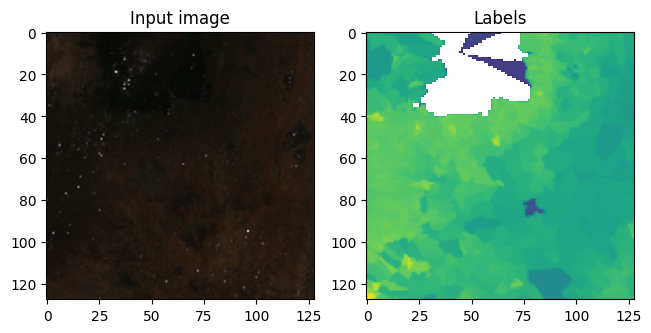

In [ ]:
show_plot(inputs)

## 📝 Write NumPy files

Finally, we need to write the training examples into files.
We chose [compressed NumPy files](https://numpy.org/doc/stable/reference/generated/numpy.savez_compressed.html) for simplicity.
We used Apache Beam [`FileSystems`](https://beam.apache.org/releases/pydoc/current/apache_beam.io.filesystems.html) to be able to write into any file system that Beam supports, including Cloud Storage.

Before writing the examples, we batch them to create files containing multiple examples, rather than a single file per example.
This reduces I/O operations when reading the dataset during training.

Here, let's create a batch from a single example, but our data creation pipeline will create larger batches.

In [ ]:
from create_dataset import write_npz

data_path = "data/"
batch = [(inputs, labels)]
write_npz(batch, data_path)

'data/e53e6840-f7e3-4a5d-81b6-f0fa5e7704bc.npz'

In [ ]:
!ls -lh data

total 600K
-rw-r--r-- 1 root root 197K Jun 29 18:02 551219a8-5958-4136-a9d6-61cceff6691e.npz
-rw-r--r-- 1 root root 197K Jun 29 18:10 9d720777-1589-4702-9b06-adc8fd51b930.npz
-rw-r--r-- 1 root root 197K Jun 29 18:38 e53e6840-f7e3-4a5d-81b6-f0fa5e7704bc.npz


## 🗃 Create the dataset

Finally, we create an
[Apache Beam](https://beam.apache.org/) pipeline, which allows us to create parallel processing pipelines.
We can even save directly to [Cloud Storage](https://cloud.google.com/storage).

Let's see how to create a small dataset from a single date!

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions

data_path = f"gs://{bucket}/test_export"
given_sample_points = ee.FeatureCollection("projects/sanford-project-04a9/assets/Kenya/128_pixel_centroids_pop_gt50")

beam_options = PipelineOptions([], direct_num_workers=20)
with beam.Pipeline(options=beam_options) as pipeline:
    (
        pipeline
        | "index" >> beam.Create([given_sample_points])
        | "📌 Sample points" >> beam.FlatMap(sample_points)
        | "🃏 Reshuffle" >> beam.Reshuffle()
        | "📑 Get example" >> beam.MapTuple(get_training_example)
        | "🗂️ Batch examples" >> beam.BatchElements()
        | "📝 Write NPZ files" >> beam.Map(write_npz, data_path)
    )

EEException: ignored

Now we can take a look at our data files.

In [ ]:
!gsutil ls -lh gs://{bucket}/weather/data-small

# ☁️ Create the dataset in Dataflow

Local testing works great for creating small datasets and making sure everything works, but to run on a large dataset at scale it's best to use a distributed runner like
[Dataflow](https://cloud.google.com/dataflow).

We can run [`create_dataset.py`](../create_dataset.py) as a script and run it in [Dataflow](https://cloud.google.com/dataflow).
You can control the number of dates to sample with `--num-dates` _(default=100)_, and the number of bins to use for the stratified sampling with `--num-bins` _(default=10)_.

We are using the same data extraction functions for both training and prediction.
This means our Dataflow pipelines needs access to the [`serving/weather-data`](../serving/weather-data) module.
Since it's a local module that does not live in [PyPI](https://pypi.org), we have to first build the module with [`build`](https://pypa-build.readthedocs.io/en/latest) and then include the package for Dataflow.

In [ ]:
# Build the `weather-data` package.
!python -m build serving/weather-data

In [ ]:
!ls -lh serving/weather-data/dist

total 8.0K
-rw-r--r-- 1 root root 3.9K Jan 10 23:51 weather_data-1.0.0-py3-none-any.whl
-rw-r--r-- 1 root root 3.1K Jan 10 23:51 weather-data-1.0.0.tar.gz


In [ ]:
data_path = f"gs://{bucket}/weather/data"

!python create_dataset.py \
  --data-path="{data_path}" \
  --runner="DataflowRunner" \
  --project="{project}" \
  --region="{location}" \
  --temp_location="gs://{bucket}/weather/temp" \
  --extra_package="./serving/weather-data/dist/weather-data-1.0.0.tar.gz"

> 💡 Look at your Dataflow jobs: https://console.cloud.google.com/dataflow/jobs

# ⛳️ What's next?

* [![Open in Colab](https://github.com/googlecolab/open_in_colab/raw/main/images/icon16.png) **🧠 Train the model**](https://colab.research.google.com/github/GoogleCloudPlatform/python-docs-samples/blob/main/people-and-planet-ai/weather-forecasting/notebooks/3-training.ipynb):
  Build a simple _Fully Convolutional Network_ in [PyTorch](https://pytorch.org/) and train it in [Vertex AI](https://cloud.google.com/vertex-ai/docs/training/custom-training) with the dataset we created.

* [![Open in Colab](https://github.com/googlecolab/open_in_colab/raw/main/images/icon16.png) **🔮 Model predictions**](https://colab.research.google.com/github/GoogleCloudPlatform/python-docs-samples/blob/main/people-and-planet-ai/weather-forecasting/notebooks/4-predictions.ipynb):
  Get predictions from the model with data it has never seen before.